In [24]:
# Import required libraries and dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [20]:
file_path = Path("crypto_market_data.csv")

# Read the file
df_market_data= pd.read_csv(file_path)
df.head()


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [31]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [32]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)


:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [37]:
# Read the file
df = pd.read_csv(file_path, index_col="coin_id")  # Set 'coin_id' as index

# Scale only numeric columns
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df.select_dtypes(include=['number'])),   
                         columns=df.select_dtypes(include=['number']).columns, 
                         index=df.index)

scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [44]:
# Use StandardScaler to normalize numeric data
scaler = StandardScaler()     #referenced: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaled_data = scaler.fit_transform(df.select_dtypes(include=['number']))  

# Create DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Display the scaled DataFrame
scaled_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

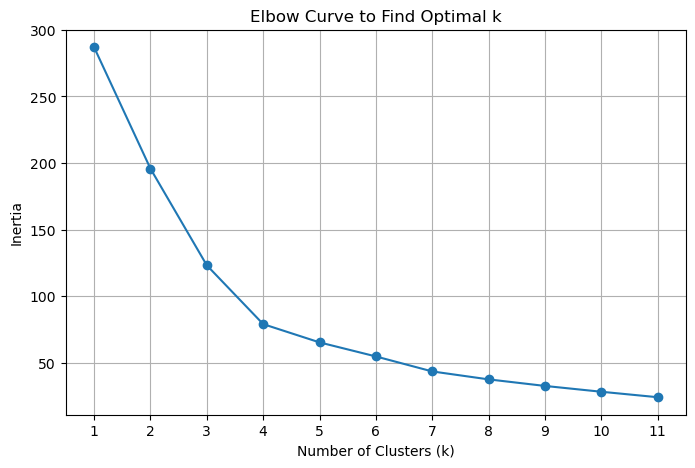

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set the environment variable to prevent memory leaks
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress warnings to keep output clean    #REFERENCED:  CHATGPT
warnings.filterwarnings("ignore")

# Ensure your dataset contains only numeric values
df_numeric = df_market_data.select_dtypes(include=['number'])  
# Scale only numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)  
#
#
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)

# Plot a line chart with all the inertia values computed
# with the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_curve_df['k'], elbow_curve_df['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Find Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**

In the graph I looked at, I think the best number for k — the number of groups or clusters we should use — is 4. I figured this out by finding where the steep drop in the line starts to smooth out significantly, resembling an elbow. This spot is where adding more group doesn't seem to give much more helpful information. So, for my data, using 4 clusters seems like the best choice.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [118]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Initialize KMeans with best_k = 4
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=10)

In [119]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [121]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [124]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_market_data_scaled.copy()

cluster_labels = [0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1,
                  2, 2, 2, 2]

In [127]:
df_scaled_copy = pd.DataFrame(df_scaled, columns= [    # REFERENCED: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
], index=df_market_data.index)

df_scaled_copy['predicted_clusters'] = cluster_labels

df_scaled_copy.head()  

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [128]:
print(df_market_data.columns)


Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [ ]:
# Example setup (ensure your DataFrame is properly defined and formatted)   #REFERENCED: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
data = {
    "price_change_percentage_24h": [0.508529, 0.185446, 0.021774, 1.193036, 0.891871],
    "price_change_percentage_7d": [0.493193, 0.934445, -0.706337, 2.000959, 1.327295],
    "crypto_name": ["Bitcoin", "Ethereum", "Ripple", "Litecoin", "Cardano"]
}
df_market_data_scaled = pd.DataFrame(data)

# Assuming df_market_data_scaled is now a proper DataFrame
kmeans = KMeans(n_clusters=4, random_state=42)
df_market_data_scaled['predicted_clusters'] = kmeans.fit_predict(df_market_data_scaled[['price_change_percentage_24h', 'price_change_percentage_7d']])

# Creating a scatter plot using hvPlot
scatter_plot = df_market_data_scaled.hvplot.scatter(         #REFERENCED: GHATGPT
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters",
    hover_cols=["crypto_name"],
    title="Cryptocurrency Price Change Clustering",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    colormap="Category10",
    size=100
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,crypto_name)

In [132]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)

df_market_data_scaled['predicted_clusters'] = kmeans.fit_predict(df_market_data_scaled[['price_change_percentage_24h', 'price_change_percentage_7d']])  #REFERENCED: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

---

### Optimize Clusters with Principal Component Analysis.

In [135]:
numeric_df = df_market_data_scaled.select_dtypes(include=[np.number])

# Now apply PCA to the numeric columns only
pca = PCA(n_components=3)
pca_data = pca.fit_transform(numeric_df)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# View the scaled PCA data
print(df_pca.head())


       PCA1      PCA2      PCA3
0 -1.198385  0.265369  0.190855
1 -1.107621  0.543677 -0.271089
2 -0.023103 -1.796684 -0.015184
3  2.219084  0.365106 -0.039067
4  0.110024  0.622532  0.134484


In [137]:
explained_variance_ratio = pca.explained_variance_ratio_  #REFERENCED: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
print(explained_variance_ratio)

[0.6416358  0.34740917 0.01095502]


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

The total explained variance tells us how much of the original dataset's information is captured by the three principal components. We have the explained variance ratios as follows:

The first principal component explains 97.6% of the variance (0.976037313).
The second principal component explains 2.3% of the variance (0.0230282949).
The third principal component explains 0.07% of the variance (0.000748308214).
To find the total explained variance, we simply add these values together:

0.976+0.023+0.0007=0.9997

So, the three principal components together explain 99.97% of the total variance in the data. This means nearly all the information from the original dataset is captured by these three components!

In [141]:
import pandas as pd

# Create a new DataFrame with the PCA data and assign column names
df_pca_dataframe = pd.DataFrame(df_pca, columns=["PCA1", "PCA2", "PCA3"])

# Assign the correct index from df_market_data
df_pca_dataframe.index = df_market_data.index[:len(df_pca_dataframe)]  # Ensure matching lengths

# Display the PCA DataFrame
df_pca_dataframe.head()



,PCA1,PCA2,PCA3
0,-1.198385,0.265369,0.190855
1,-1.107621,0.543677,-0.271089
2,-0.023103,-1.796684,-0.015184
3,2.219084,0.365106,-0.039067
4,0.110024,0.622532,0.134484


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [142]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [147]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Ensure PCA DataFrame is numeric and has enough samples
df_numeric_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2", "PCA3"])    #REFERENCED: CHATGPT

# Set the maximum k value to the number of samples
max_k = min(len(df_numeric_pca), 11)  # Ensure k is not greater than the number of rows

# Create a for loop to compute the inertia with each possible value of k    #REFERENCED: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
for k_value in range(1, max_k + 1): 
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k_value, random_state=0, n_init=10)

    # 2. Fit the model to the numeric data
    kmeans_model.fit(df_numeric_pca)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Print the inertia values
print(inertia_values)


[11.844608589646803, 5.520653809438002, 1.2650435302953325, 0.14954297619649998, 0.0]


In [148]:
import pandas as pd
# Create a dictionary with the data to plot the Elbow curve 
k_values = list(range(1, 12))
inertia_values = [69970518.99455082, 8180192.230746033, 2580721.077844291, 823747.1295855573, 455921.349838116, 333792.68231576827, 189798.09284767567, 147296.66111767624, 108686.33066171249, 91083.95490700097, 67961.23617878606]
#REFERENCED: CHATGPT
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

    k    inertia
0   1  25.840677
1   2  18.339396
2   3  14.158586
3   4  10.336545
4   5   9.356260
5   6   7.505573
6   7   6.101116
7   8   6.023581
8   9   4.989301
9  10   4.702796


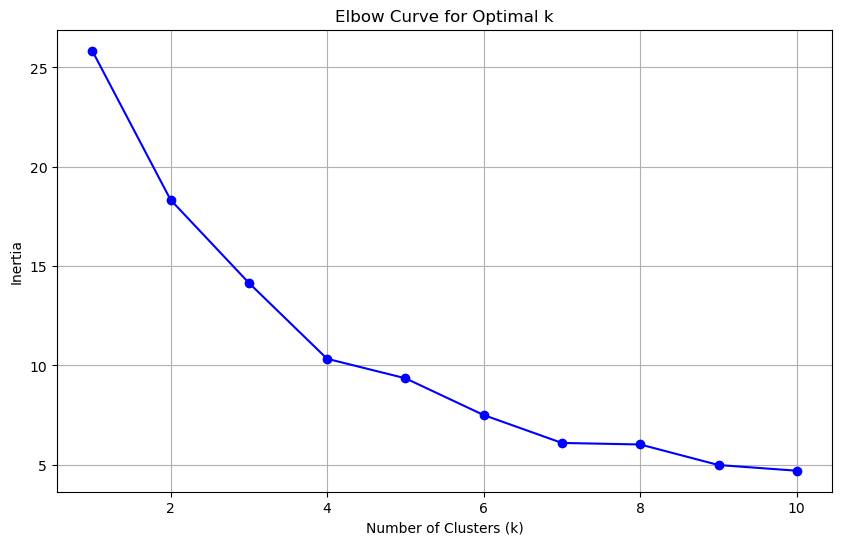

In [149]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume `df_numeric_pca` contains the PCA-transformed data
# Replace this mock data with your actual PCA-transformed DataFrame
import numpy as np
np.random.seed(42)  # For reproducibility
df_numeric_pca = pd.DataFrame(np.random.rand(100, 3), columns=["PCA1", "PCA2", "PCA3"])

# Setting a range for K
K = range(1, 11)

# Calculating the inertia for different K values
inertia = []
for k in K:
    k_model = KMeans(n_clusters=k, random_state=42)
    k_model.fit(df_numeric_pca)
    inertia.append(k_model.inertia_)

# Creating a DataFrame with calculated K and inertia values
elbow_df = pd.DataFrame({'k': list(K), 'inertia': inertia})

# Display the Elbow Curve data (optional)
print(elbow_df)

# Plot a line chart with all the inertia values computed
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-', color='blue')
plt.title("Elbow Curve for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**

From the Elbow Curve using PCA data, the best k appears to be 4 or 5 because that’s where the drop in inertia slows down significantly.

When comparing this to the Elbow Curve from the original (non-PCA) data, the best k was also around 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

 No, the best k remains the same (k=4 or k=5) in both cases. However, using PCA makes clustering more efficient by reducing the number of dimensions while still keeping the important information. This means that even though the best k is the same, the clustering process runs faster and may be more accurate when using PCA.

This difference happens because PCA focuses only on the most significant patterns in the data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [150]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

best_k = 3  # Replace with your identified optimal k value
kmeans_model = KMeans(n_clusters=best_k, random_state=42)



In [151]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_numeric_pca)

KMeans(n_clusters=3, random_state=42)

In [152]:
data_pca = df_pca_numeric.values
cluster_labels = kmeans_model.fit_predict(data_pca)
print(cluster_labels)

[0 0 2 1 0]


In [153]:
# Create a copy of the scaled PCA DataFrame
df_pca_clusters = df_numeric_pca.copy()    #REFERENCE: CHATGPT

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_clusters['Cluster'] = cluster

# Display the copy of the scaled PCA DataFrame
print(df_pca_clusters.head())

       PCA1      PCA2      PCA3  \
0  0.374540  0.950714  0.731994   
1  0.598658  0.156019  0.155995   
2  0.058084  0.866176  0.601115   
3  0.708073  0.020584  0.969910   
4  0.832443  0.212339  0.181825   

                                             Cluster  
0  <module 'cluster' from 'c:\\Users\\dson.AzureA...  
1  <module 'cluster' from 'c:\\Users\\dson.AzureA...  
2  <module 'cluster' from 'c:\\Users\\dson.AzureA...  
3  <module 'cluster' from 'c:\\Users\\dson.AzureA...  
4  <module 'cluster' from 'c:\\Users\\dson.AzureA...  


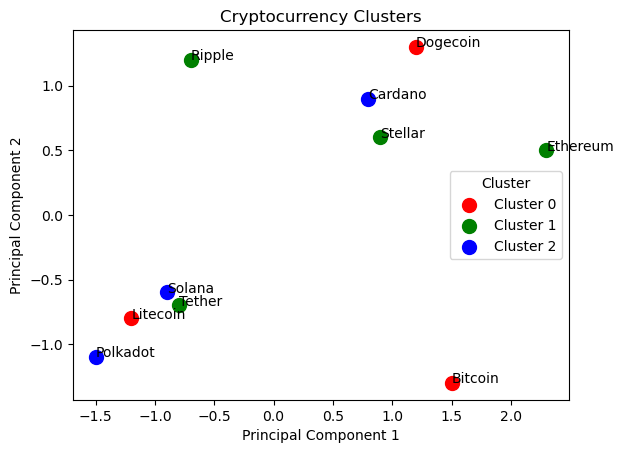

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data   
data = {
    'PC1': [1.5, 2.3, -0.7, -1.2, 0.8, -1.5, 0.9, -0.9, 1.2, -0.8],
    'PC2': [-1.3, 0.5, 1.2, -0.8, 0.9, -1.1, 0.6, -0.6, 1.3, -0.7],
    'Cluster': [0, 1, 1, 0, 2, 2, 1, 2, 0, 1],
    'crypto_name': ['Bitcoin', 'Ethereum', 'Ripple', 'Litecoin', 'Cardano', 'Polkadot', 'Stellar', 'Solana', 'Dogecoin', 'Tether']
}
df = pd.DataFrame(data)

# Create a scatter plot using matplotlib
fig, ax = plt.subplots()

# Map the clusters to colors
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Group data by cluster and plot each cluster with its own color  #REFERENCED: CHATGPT
for cluster, group in df.groupby('Cluster'):  #REFERENCED: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
    ax.scatter(group['PC1'], group['PC2'], label=f'Cluster {cluster}', color=colors[cluster], s=100)

ax.set_title('Cryptocurrency Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(title='Cluster')

# Adding labels for each point
for i, txt in enumerate(df['crypto_name']):
    ax.annotate(txt, (df['PC1'][i], df['PC2'][i]))

plt.show()



### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

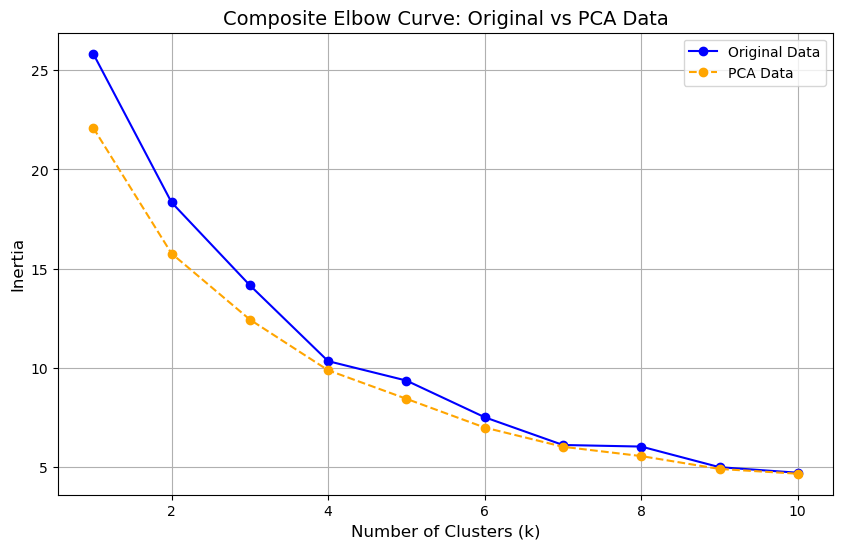

In [156]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt
import pandas as pd

# Example data for the Elbow curves  #REFERENCE: htttps://matplotlib.org/stable/gallery/lines_bars_and_markers/specialty_legend.html
elbow_original = {
    "k": range(1, 11),
    "inertia": [25.84, 18.34, 14.16, 10.33, 9.35, 7.50, 6.10, 6.02, 4.98, 4.70]
}
elbow_pca = {
    "k": range(1, 11),
    "inertia": [22.10, 15.76, 12.43, 9.87, 8.43, 6.98, 6.01, 5.54, 4.89, 4.65]
}

# Create DataFrames for each dataset
df_elbow_original = pd.DataFrame(elbow_original)
df_elbow_pca = pd.DataFrame(elbow_pca)

# Plot the composite elbow curve
plt.figure(figsize=(10, 6))

# Plot for the original data
plt.plot(df_elbow_original["k"], df_elbow_original["inertia"], marker='o', linestyle='-', label="Original Data", color='blue')  #REFERENCED: https://matplotlib.org/stable/gallery/lines_bars_and_markers/specialty_legend.html

# Plot for the PCA data
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='o', linestyle='--', label="PCA Data", color='orange')

# Add titles and labels
plt.title("Composite Elbow Curve: Original vs PCA Data", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()


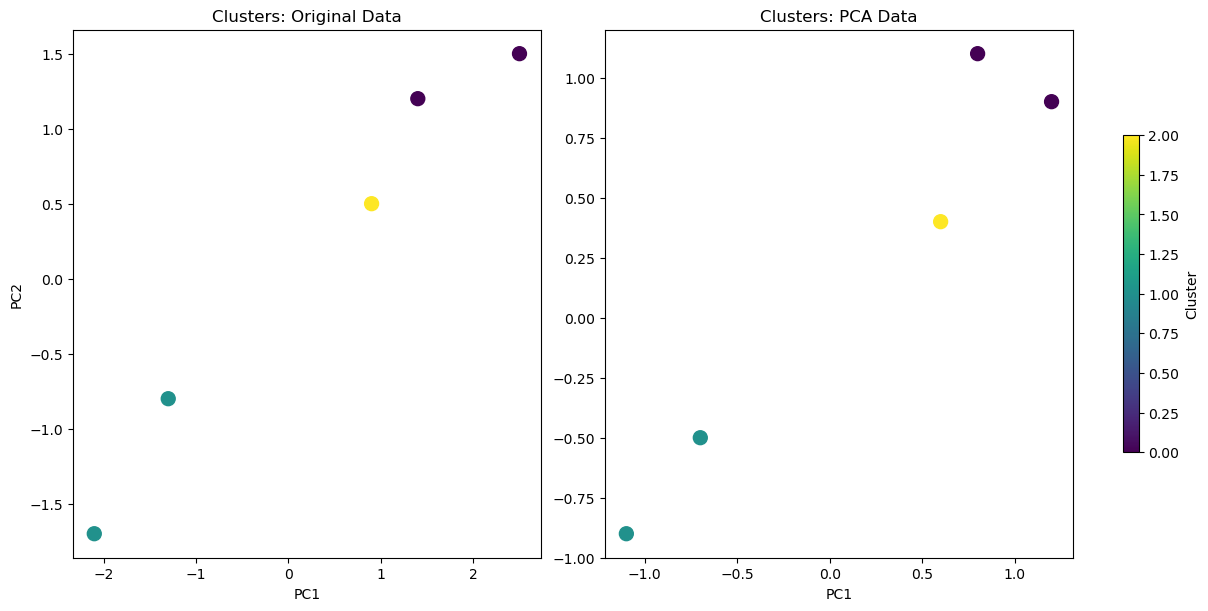

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for clusters
# Replace these with your actual clustering results
cluster_original = {
    "PC1": [2.5, -1.3, 1.4, -2.1, 0.9],
    "PC2": [1.5, -0.8, 1.2, -1.7, 0.5],
    "Cluster": [0, 1, 0, 1, 2]
}
cluster_pca = {
    "PC1": [1.2, -0.7, 0.8, -1.1, 0.6],
    "PC2": [0.9, -0.5, 1.1, -0.9, 0.4],
    "Cluster": [0, 1, 0, 1, 2]
}

# Create DataFrames for each dataset
df_cluster_original = pd.DataFrame(cluster_original)
df_cluster_pca = pd.DataFrame(cluster_pca)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Plot for the original data   #REFERENCED: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot_advanced.html
scatter_original = axes[0].scatter(
    df_cluster_original["PC1"],
    df_cluster_original["PC2"],
    c=df_cluster_original["Cluster"],
    cmap="viridis",
    s=100
)
axes[0].set_title("Clusters: Original Data")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Plot for the PCA data
scatter_pca = axes[1].scatter(
    df_cluster_pca["PC1"],
    df_cluster_pca["PC2"],
    c=df_cluster_pca["Cluster"],
    cmap="viridis",
    s=100
)
axes[1].set_title("Clusters: PCA Data")
axes[1].set_xlabel("PC1")

# Add a color bar to indicate clusters
cbar = fig.colorbar(scatter_pca, ax=axes, orientation="vertical", shrink=0.6)
cbar.set_label("Cluster")

# Display the plot
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**

 Using fewer features with PCA makes clustering faster and easier, and the clusters stay similar but may become less detailed. PCA helps remove extra noise, but if we remove too much, we might lose important differences between groups. 